##### 워드클라우드 시각화 과정

In [167]:
import pandas as pd

df = pd.read_csv("./project_merge.csv")
df.tail()

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,필요역량,인덱스
939,딥파인,경력 3~15년,회사내규에 따름,서울 용산구 한강대로30길 25,딥러닝,Visual SLAM(vSLAM) 개발자,"['OpenCVC++PythonC', '• 카메라 기반 Visual Mapping/...",940
940,다이얼로그디자인에이전시,경력 5~7년,회사내규에 따름,서울 송파구 송파대로 201 A동 1014호,딥러닝,[5년 이상 리더급] 풀스택 소프트웨어 엔지니어,['GCPGitDjangoReactAWSFlaskPythonAZUREDockerFl...,941
941,피처링,경력 2~10년,회사내규에 따름,"서울 강남구 테헤란로 419, 15층 (강남파이낸스플라자)",딥러닝,서버 및 백엔드 개발자 채용,['GCPAI/인공지능BigDataMachineLearningJavaAWSPytho...,942
942,딥엑스,경력 5~20년,회사내규에 따름,경기 성남시 분당구 판교역로241번길 20 5층,딥러닝,[AI반도체] 딥엑스 SoC ASIC 설계 Engineer,"['LinuxShellPythonVerilog', '[직무소개]\n딥엑스는 인공지능...",943
943,데이터메이커,경력 3~15년,회사내규에 따름,"대전 유성구 유성대로 871, 4-5층",딥러닝,Backend Engineer,['DjangoDjango REST frameworkUbuntuRedisPython...,944


In [168]:
df['필요역량'] = df['필요역량'].str.replace('\n', '').str.replace('•', '').str.replace('\\n', '')

In [169]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import re
# 불용어 처리를 위해 작은 따옴표 제거
df['필요역량'] = df['필요역량'].apply(lambda x: x.replace("'", ""))

stop_words = set(['•', '[', ']', '(', ')', ',','-', '및', '또는','혹은', '관련', '분' 
                  ,'등','대한','이상',':','있는','있으신', '경험이', '분야','이해','수','기반','in'
                  ,'분', 'or','따라','소지자','or','언어','소지자', '보유','후','보유자','분-','이상이신','Experience'
                  ,'경험','경력','능력','2년', '필수','.','제출서류','정규직','사용','새로운','통계','/','경험-'
                  ,'유관', '>', '*','개발', '--', '>', '인크루트', '채용','자격요건','담당업무'
                   ,'접수방법', '전형단계','@','모집부문','주','있습니다','근무부서','이력서','경우','서류전형','and','우대사항'
                   ,'기타','근무조건','입사지원서',"'", '우대사항', '기타','연봉','명', '모집','취소될','기술', '허위사실이'
                   ,'채용이', '고용형태', '협의', '유의사항', '지원', '있을', '인원','제출서류에','결정','경험자','개발자'
                   ,'자기소개서','면접진행','직급/직책','업무', '&', '서비스','최종합격추가','채용시', '우대', '!', '00','to'
                   ,'최종심사','위한','면접','0','경력사항', '채용시스템접수양식','개발-', '1', '신입', 'the','관리',  '함께'
                   ,'다양한','제출서류이력서', '학력사항', '급여조건', '근무', '3년', '가능', '활용', '가능자','모델', 'SW', '프로그래밍','of'
                   , '컴퓨터','Data','우리', 'with', '프로그램','SW', '?', '운영','#', '소프트웨어','졸업','연구', '이상-', '통한'
                   , "'시스템", '이메일', '지식', '실무', '수습기간3개월', '~', '자동화', '근무지', '시', '4년', '서울', '를', '중','◈','이상의'
                   ,'2', '5일', '개별', '플랫폼', '자', '한', '신입/경력', '안내', '활용한', '솔루션', '연락처','기술을','구축', "''",'전공','교육'
                   , '비희망', 'Learning', '있으며', '면접전형', 'a',  '%', 'learning', '센서',  '대학교', '5년', '가능한', '위해', '많은', '작성'
                   ,'처리','학력', '포함', '수행', '경력직', '하는', '전형', '1년', '역량', '무관', '병역특례', '접수','채용시스템', '게임','희망연봉','기반의'
                   ,'대해', "'SW", '최종합격', '제품', '프레임워크','최신',"'플랫폼", '국내','연차무관','제작', '●', '커뮤니케이션', '구현','영상','외'
                   ,"'SW", "'제어", "'알고리즘", '마감', '경기도','디자인','제출','유경험자','자유양식', 'Engineer', '에'
                   , '기업', "'임베디드", 'Vehicle', "'SW", '대기업', '상세', '정규직급여조건','회사를','줄로','by', '오전',  '해당', '모터', '최종', '이'
                   , '보유하신','서류는', '합격자에', '근무시간', 'our', 'for', '내','학과', '이용한', '10년', '높은', '우대-', '대학', '이메일접수양식', '전문기업'
                   ,  'naver.com', '그', '통해', '4년제', '없는', '·', '등의', '전','온라인','사원','일체','제공','하고','바랍니다','취업','as','전문', '■', '영업'
                   , 'Machine', '지급', '오후','미','최적화', '제출서류전형단계', '개선', '검증', '유의사항입사지원서', '학습', '이미지', '성능'
                   ,'경험을', '명근무조건고용형태', '결정전형단계', 'Computer', 'Object', '경로', '카메라', '가능하신', '이해가','서비스를' 
                   , '등을', '테스트', '문제를','모델을', '경량화', '관심이', '비전','환경에서', 'Deep'  ])


keywords = []

for text in df['필요역량']:
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    keywords.extend(tokens)

# 빈도 분포 계산
freq_dist = FreqDist(keywords)

# 가장 많이 나오는 상위 64개 키워드 출력
top_keywords = freq_dist.most_common(60)
print(top_keywords)

[('알고리즘', 371), ('설계', 364), ('AI', 359), ('딥러닝', 344), ('데이터', 326), ('로봇', 297), ('시스템', 269), ('제어', 259), ('분석', 238), ('프로젝트', 216), ('자율주행', 213), ('Python', 182), ('SW', 157), ('C', 130), ('학위', 116), ('석사', 109), ('Linux', 104), ('학사', 98), ('C/C++', 97), ('영상처리', 97), ('인공지능', 94), ('C++', 90), ('임베디드', 88), ('머신러닝', 84), ('3D', 77), ('경력자', 76), ('회로', 72), ('전공자', 69), ('Embedded', 68), ('논문', 67), ('통신', 67), ('영어', 67), ('S/W', 67), ('ADAS', 64), ('엔지니어', 63), ('Vision', 62), ('협업', 61), ('네트워크', 60), ('기획', 58), ('Data', 58), ('컴퓨터공학', 58), ('PLC', 56), ('웹', 55), ('ROS', 55), ('공학', 54), ('API', 54), ('드론', 54), ('Tensorflow', 52), ('박사', 51), ('Computer', 50), ('Object', 49), ('서버', 48), ('응용', 47), ('자격증', 46), ('백엔드', 46), ('모델링', 45), ('R', 43), ('Android', 43), ('Deep', 42), ('전기', 41)]


In [170]:
# 키워드 추출 함수 정의
def extract_top_keywords(text, top_keywords):
    keywords = []
    for keyword, _ in top_keywords:
        pattern = r'\b{}\b'.format(re.escape(keyword))
        matches = re.findall(pattern, text, flags=re.IGNORECASE)
        keywords.extend(matches)
    return keywords

# '키워드추출' 열에 키워드 추출 적용
df['필요역량'] = df['필요역량'].apply(lambda x: extract_top_keywords(x, top_keywords))

# '키워드추출' 열에서 중복값 제거
df['필요역량'] = df['필요역량'].apply(lambda x: list(set(x)))

# 결과 출력
df[['필요역량']]

,필요역량
0,"[Linux, 3D, 자율주행, 웹, 기획, 공학, 학사, 설계]"
1,"[vision, object, Python, deep, 자율주행, computer,..."
2,"[영상처리, Python, AI, 분석, 자율주행, 학위, 석사, C, 시스템, 논..."
3,"[알고리즘, Python, 학위, 자율주행, 제어, C, 공학, 박사, 딥러닝, 프..."
4,"[전공자, 알고리즘, Python, 경력자, ROS, 분석, 자율주행, 제어, 데이..."
...,...
939,"[Python, 알고리즘, 3D, 학위, Vision, C, 박사, Computer]"
940,"[엔지니어, Python, 서버, 백엔드, 웹, 데이터, 응용, 설계, 시스템, A..."
941,"[Python, 서버, 웹, 데이터, 설계, 시스템, AI, 응용]"
942,"[Linux, python, 설계, 시스템, 인공지능, AI]"


In [171]:
df.head()

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,필요역량,인덱스
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,"[Linux, 3D, 자율주행, 웹, 기획, 공학, 학사, 설계]",1
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,"[vision, object, Python, deep, 자율주행, computer,...",2
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,"[영상처리, Python, AI, 분석, 자율주행, 학위, 석사, C, 시스템, 논...",3
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,"[알고리즘, Python, 학위, 자율주행, 제어, C, 공학, 박사, 딥러닝, 프...",4
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),"[전공자, 알고리즘, Python, 경력자, ROS, 분석, 자율주행, 제어, 데이...",5


##### 추가 작업, 키워드 추출 -> 필요역량으로, 필요역량 열 삭제

In [162]:
# '필요역량' 열 삭제
df.drop('필요역량', axis=1, inplace=True)

In [163]:
#키워드 추출 열 -> 필요역량
df.rename(columns={'키워드추출': '필요역량'}, inplace=True)

In [172]:
df.head()

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,필요역량,인덱스
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,"[Linux, 3D, 자율주행, 웹, 기획, 공학, 학사, 설계]",1
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,"[vision, object, Python, deep, 자율주행, computer,...",2
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,"[영상처리, Python, AI, 분석, 자율주행, 학위, 석사, C, 시스템, 논...",3
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,"[알고리즘, Python, 학위, 자율주행, 제어, C, 공학, 박사, 딥러닝, 프...",4
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),"[전공자, 알고리즘, Python, 경력자, ROS, 분석, 자율주행, 제어, 데이...",5


In [173]:
df.to_csv('project_merge_result.csv', index=False)

##### 워드클라우드 및 시각화

In [174]:
df = pd.read_csv("./project_merge_result.csv")

In [175]:
df.head()

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,필요역량,인덱스
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,"['Linux', '3D', '자율주행', '웹', '기획', '공학', '학사',...",1
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,"['vision', 'object', 'Python', 'deep', '자율주행',...",2
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,"['영상처리', 'Python', 'AI', '분석', '자율주행', '학위', '...",3
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,"['알고리즘', 'Python', '학위', '자율주행', '제어', 'C', '공...",4
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),"['전공자', '알고리즘', 'Python', '경력자', 'ROS', '분석', ...",5


In [176]:
df['필요역량'] = df['필요역량'].replace({'\[\]|\[|\]|\'': ''}, regex=True).str.strip()


In [177]:
df.head()

,기업이름,고용형태,연봉,기업주소,키워드,담당업무,필요역량,인덱스
0,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,[2년 이상] 자율주행 Front-End 개발자,"Linux, 3D, 자율주행, 웹, 기획, 공학, 학사, 설계",1
1,뷰런테크놀로지,-,-,"서초구 강남대로 311, 19층",자율주행,자율주행 인지 개발자,"vision, object, Python, deep, 자율주행, computer, ...",2
2,씨엔비스,4년,-,"경기도 성남시 수정구 창업로 43, 판교 글로벌비즈센터 A동 907~910호",자율주행,자율주행 인지 개발자,"영상처리, Python, AI, 분석, 자율주행, 학위, 석사, C, 시스템, 논문...",3
3,컨트롤웍스,2년,연봉업계평균이상,서울 강남구 언주로81길 13 진일빌딩 3층,자율주행,자율주행 SW 엔지니어,"알고리즘, Python, 학위, 자율주행, 제어, C, 공학, 박사, 딥러닝, 프로젝트",4
4,베스텔라랩,2년,연봉업계평균이상,안양시 동안구 엘에스로116번길 118 안양2차 SKV1 Center,자율주행,자율주행 연구원(경기/대구)(전문연구요원가능),"전공자, 알고리즘, Python, 경력자, ROS, 분석, 자율주행, 제어, 데이터...",5


In [178]:
import nltk
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

* png는 배경이 투명이라 워드클라우드 인식이 잘안되니 jpg변환 후 사용

[nltk_data] Downloading package punkt to /home/ito/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


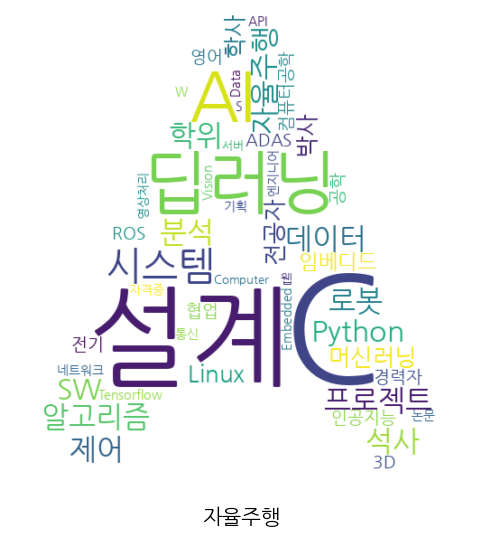

In [179]:

# 필요한 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터프레임에서 '키워드' 열의 각 행을 문자열로 변환하여 리스트에 추가
all_keywords = []

for index, row in df.iterrows():
    if '자율주행' in row['키워드']:
        # 각 키워드 리스트를 하나의 문자열로 변환하여 리스트에 추가
        words = df['필요역량'].str.split(',').explode().str.strip()
        most_common_words = words.value_counts().head(50)
        all_keywords_text = ' '.join(most_common_words.index.astype(str))

img_path = "../../music_picture/a.jpg"
# 배경 이미지로 사용할 그림 읽기
bg_img = Image.open(img_path).convert('RGBA')
bg_array = np.array(bg_img)

# WordCloud 객체 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=bg_array,
    mode='RGBA',
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
).generate(all_keywords_text)

# 이미지에 텍스트 추가
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# 워드 클라우드 위에 텍스트 추가 
text = "자율주행"
plt.text(0.5, -0.1, text, color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# 워드클라우드 시각화
plt.show()


[nltk_data] Downloading package punkt to /home/ito/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


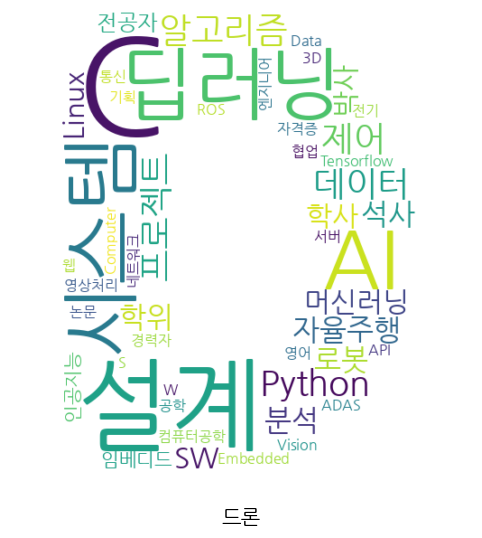

In [180]:
# 필요한 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터프레임에서 '키워드' 열의 각 행을 문자열로 변환하여 리스트에 추가
all_keywords = []

for index, row in df.iterrows():
    if '드론' in row['키워드']:
        # 각 키워드 리스트를 하나의 문자열로 변환하여 리스트에 추가
        words = df['필요역량'].str.split(',').explode().str.strip()
        most_common_words = words.value_counts().head(50)
        all_keywords_text = ' '.join(most_common_words.index.astype(str))

img_path = "../../music_picture/d.jpg"
# 배경 이미지로 사용할 그림 읽기
bg_img = Image.open(img_path).convert('RGBA')
bg_array = np.array(bg_img)

# WordCloud 객체 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=bg_array,
    mode='RGBA',
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
).generate(all_keywords_text)

# 이미지에 텍스트 추가
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# 워드 클라우드 위에 텍스트 추가 
text = "드론"
plt.text(0.5, -0.1, text, color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# 워드클라우드 시각화
plt.show()

[nltk_data] Downloading package punkt to /home/ito/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


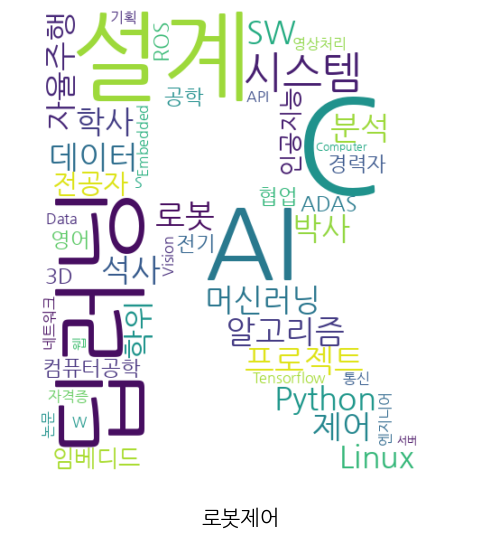

In [181]:
# 필요한 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터프레임에서 '키워드' 열의 각 행을 문자열로 변환하여 리스트에 추가
all_keywords = []

for index, row in df.iterrows():
    if '로봇제어' in row['키워드']:
        # 각 키워드 리스트를 하나의 문자열로 변환하여 리스트에 추가
        words = df['필요역량'].str.split(',').explode().str.strip()
        most_common_words = words.value_counts().head(50)
        all_keywords_text = ' '.join(most_common_words.index.astype(str))

img_path = "../../music_picture/r.jpg"
# 배경 이미지로 사용할 그림 읽기
bg_img = Image.open(img_path).convert('RGBA')
bg_array = np.array(bg_img)

# WordCloud 객체 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=bg_array,
    mode='RGBA',
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
).generate(all_keywords_text)

# 이미지에 텍스트 추가
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# 워드 클라우드 위에 텍스트 추가 
text = "로봇제어"
plt.text(0.5, -0.1, text, color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# 워드클라우드 시각화
plt.show()

[nltk_data] Downloading package punkt to /home/ito/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


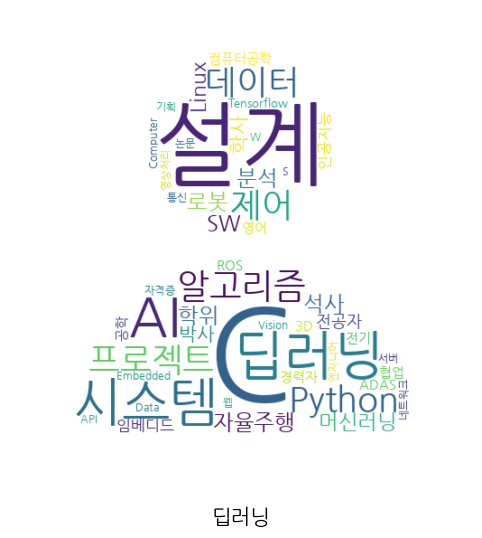

In [185]:
# 필요한 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 데이터프레임에서 '키워드' 열의 각 행을 문자열로 변환하여 리스트에 추가
all_keywords = []

for index, row in df.iterrows():
    if '딥러닝' in row['키워드']:
        # 각 키워드 리스트를 하나의 문자열로 변환하여 리스트에 추가
        words = df['필요역량'].str.split(',').explode().str.strip()
        most_common_words = words.value_counts().head(50)
        all_keywords_text = ' '.join(most_common_words.index.astype(str))

img_path = "../../music_picture/ai.jpg"
# 배경 이미지로 사용할 그림 읽기
bg_img = Image.open(img_path).convert('RGBA')
bg_array = np.array(bg_img)

# WordCloud 객체 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    mask=bg_array,
    mode='RGBA',
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
).generate(all_keywords_text)

# 이미지에 텍스트 추가
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# 워드 클라우드 위에 텍스트 추가 
text = "딥러닝"
plt.text(0.5, -0.1, text, color='black', fontsize=15, ha='center', va='center', transform=ax.transAxes)

# 워드클라우드 시각화
plt.show()